<a href="https://colab.research.google.com/github/sylviarezk/Dataanalytics-2023/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- import pandas,scikit-learn and read csv file





In [2]:
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/sylviarezk/Dataanalytics-2023/main/New_York_City_Leading_Causes_of_Death.csv')

# 2- explore the data

In [ ]:
df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.


In [ ]:
df.shape

(1803, 7)

In [ ]:
df.dtypes

Year                         int64
Leading Cause               object
Sex                         object
Race Ethnicity              object
Deaths                     float64
Death Rate                 float64
Age Adjusted Death Rate    float64
dtype: object

#3- cleaning and tiding

In [6]:
numeric_columns = ['Deaths', 'Death Rate','Age Adjusted Death Rate']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [7]:
df.isnull().sum()

Year                         0
Leading Cause                0
Sex                          0
Race Ethnicity               0
Deaths                     138
Death Rate                 607
Age Adjusted Death Rate    607
dtype: int64

In [8]:
df_clean = df.dropna(subset=['Deaths'])

#* applying linear regression model to predict the missing death rate data through the deaths

In [9]:
known_data = df_clean[df_clean['Death Rate'].notna()]
missing_data = df_clean[df_clean['Death Rate'].isna()]

# Features for prediction
features = ['Deaths']

# Fit a linear regression model
model = LinearRegression()
model.fit(known_data[features], known_data['Death Rate'])

# Predict missing values
predicted_death_rate = model.predict(missing_data[features])

# Update missing values in the DataFrame
df_clean.loc[df_clean['Death Rate'].isna(), 'Death Rate'] = predicted_death_rate

In [10]:
df_clean['Sex'].unique()

array(['M', 'F', 'Male', 'Female'], dtype=object)

In [16]:
df_clean_copy = df_clean.copy()
df_clean_copy.loc[:, 'Sex'] = df_clean_copy['Sex'].replace(('M', 'F'), ('Male', 'Female'))

In [19]:
df_clean_copy['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
df_clean_analysis = df_clean_copy[['Year','Leading Cause','Sex','Race Ethnicity','Deaths','Death Rate']]

#4- descriptive analysis

In [26]:
df_clean_analysis.groupby('Year')['Death Rate'].sum().sort_values(ascending=False)

Year
2019    6813.971440
2018    6327.013349
2016    5474.948448
2015    5375.674697
2017    5373.437142
2013    5195.330924
2008    5173.426813
2014    5170.437699
2007    5146.894898
2012    5079.080379
2011    5068.764953
2010    5018.088083
2009    5007.190282
Name: Death Rate, dtype: float64

In [27]:
df_2019 = df_clean_analysis.loc[df_clean['Year'] == 2019]

In [28]:
df_2019.groupby('Leading Cause')['Deaths'].sum().sort_values(ascending=False)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)                                                                                       17821.0
Malignant Neoplasms (Cancer: C00-C97)                                                                                                12445.0
All Other Causes                                                                                                                     11647.0
Diabetes Mellitus (E10-E14)                                                                                                           1894.0
Cerebrovascular Disease (Stroke: I60-I69)                                                                                             1887.0
Chronic Lower Respiratory Diseases (J40-J47)                                                                                          1814.0
Influenza (Flu) and Pneumonia (J09-J18)                                                                                               1623.0

In [29]:
df_heart = df_clean_analysis.loc[df_clean['Leading Cause'] =='Diseases of Heart (I00-I09, I11, I13, I20-I51)']

In [31]:
df_grouped_heart_sex = df_heart.groupby('Sex')['Death Rate'].sum()

<Axes: xlabel='Sex'>

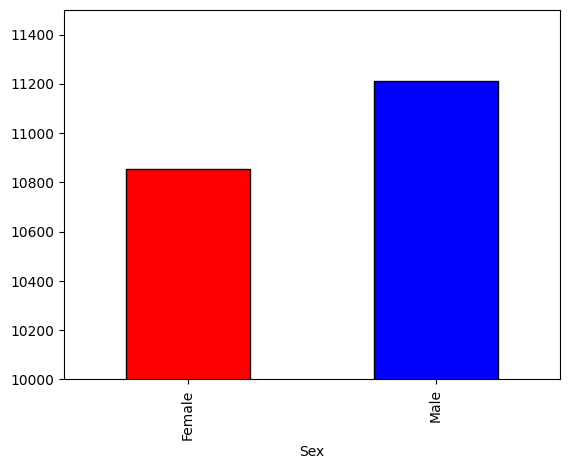

In [43]:
df_grouped_heart_sex.plot(kind='bar',color = ('red','blue') ,ylim=(10000,11500),edgecolor='black')

In [39]:
df_grouped_heart_year = df_heart.groupby('Year')['Death Rate'].sum()

<Axes: xlabel='Year'>

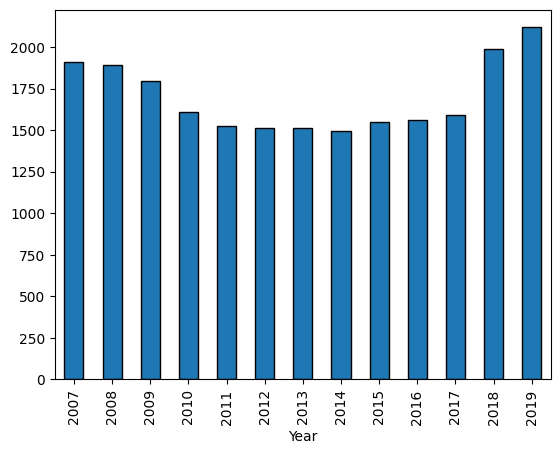

In [40]:
df_grouped_heart_year.plot(kind='bar',edgecolor='black')

In [41]:
df_grouped_heart_race = df_heart.groupby('Race Ethnicity')['Death Rate'].sum().sort_values(ascending=False)

<Axes: xlabel='Race Ethnicity'>

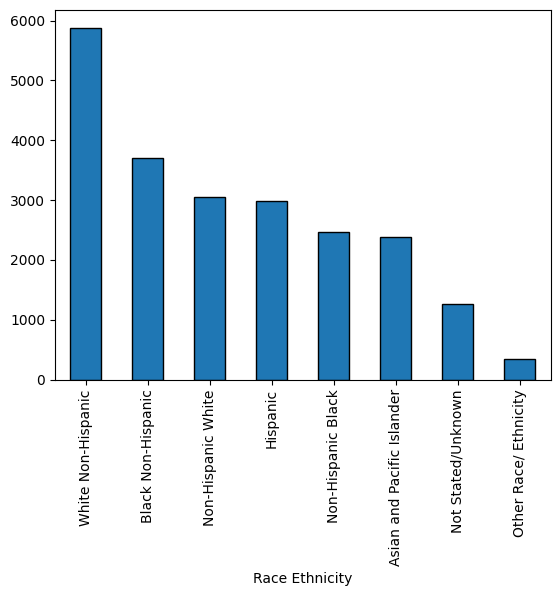

In [42]:
df_grouped_heart_race.plot(kind='bar',edgecolor='black')